In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv('modeeling.csv')

In [67]:
X = df[['country', 
        'deposit_type', 
        'reservation_status_date_integer',
        'country', 
        'market_segment', 
        'adr', 
        'total_of_special_requests', 
        'arrival_date_day_of_month', 
        'arrival_date_month', 
        'agent'
       ]]

y = df['is_canceled']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y, test_size=0.2, random_state=42)
# 80% Training 20 Tesst

In [69]:
df.describe()

# Karena datanya cukup beragam, maka akan di-scaling terlebih dahulu

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,bookingID,stays,reservation_status_date_integer
count,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,...,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000
mean,31.432407,0.370512,102.215076,6.552674,15.787288,1.856516,0.103938,0.008044,0.556715,84.816764,...,0.125599,81.877495,2.349141,2.139022,101.894426,0.060966,0.572188,41643.837303,3.437159,576.018549
std,18.455502,0.482945,100.551173,3.090936,8.775413,0.605591,0.399457,0.100751,1.069593,41.585833,...,0.335378,105.173259,17.594524,0.575808,48.019023,0.240727,0.793458,24042.425838,2.561861,227.638991
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,0.000000,18.000000,4.000000,8.000000,2.000000,0.000000,0.000000,0.000000,51.000000,...,0.000000,9.000000,0.000000,2.000000,70.000000,0.000000,0.000000,20822.500000,2.000000,397.000000
50%,31.000000,0.000000,69.000000,7.000000,16.000000,2.000000,0.000000,0.000000,0.000000,73.000000,...,0.000000,21.000000,0.000000,2.000000,95.000000,0.000000,0.000000,41636.000000,3.000000,583.000000
75%,47.000000,1.000000,160.000000,9.000000,23.000000,2.000000,0.000000,0.000000,0.000000,124.000000,...,0.000000,156.000000,0.000000,2.000000,126.000000,0.000000,1.000000,62464.500000,4.000000,768.000000
max,63.000000,1.000000,365.000000,12.000000,31.000000,55.000000,10.000000,10.000000,4.000000,161.000000,...,2.000000,535.000000,365.000000,3.000000,508.000000,3.000000,5.000000,83293.000000,56.000000,982.000000


In [70]:
# Dilakukan standar scaler agar penyimpangan datanya tidak terlalu jauh

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()
X_train = ss_scaler.fit_transform(X_train)
X_test = ss_scaler.fit_transform(X_test)

# 3. Modelling

In [71]:
cek_corr = df[['country', 
        'deposit_type', 
        'country', 
        'market_segment', 
        'adr', 
        'total_of_special_requests', 
        'arrival_date_day_of_month', 
        'arrival_date_month', 
        'agent','is_canceled']]

<AxesSubplot:>

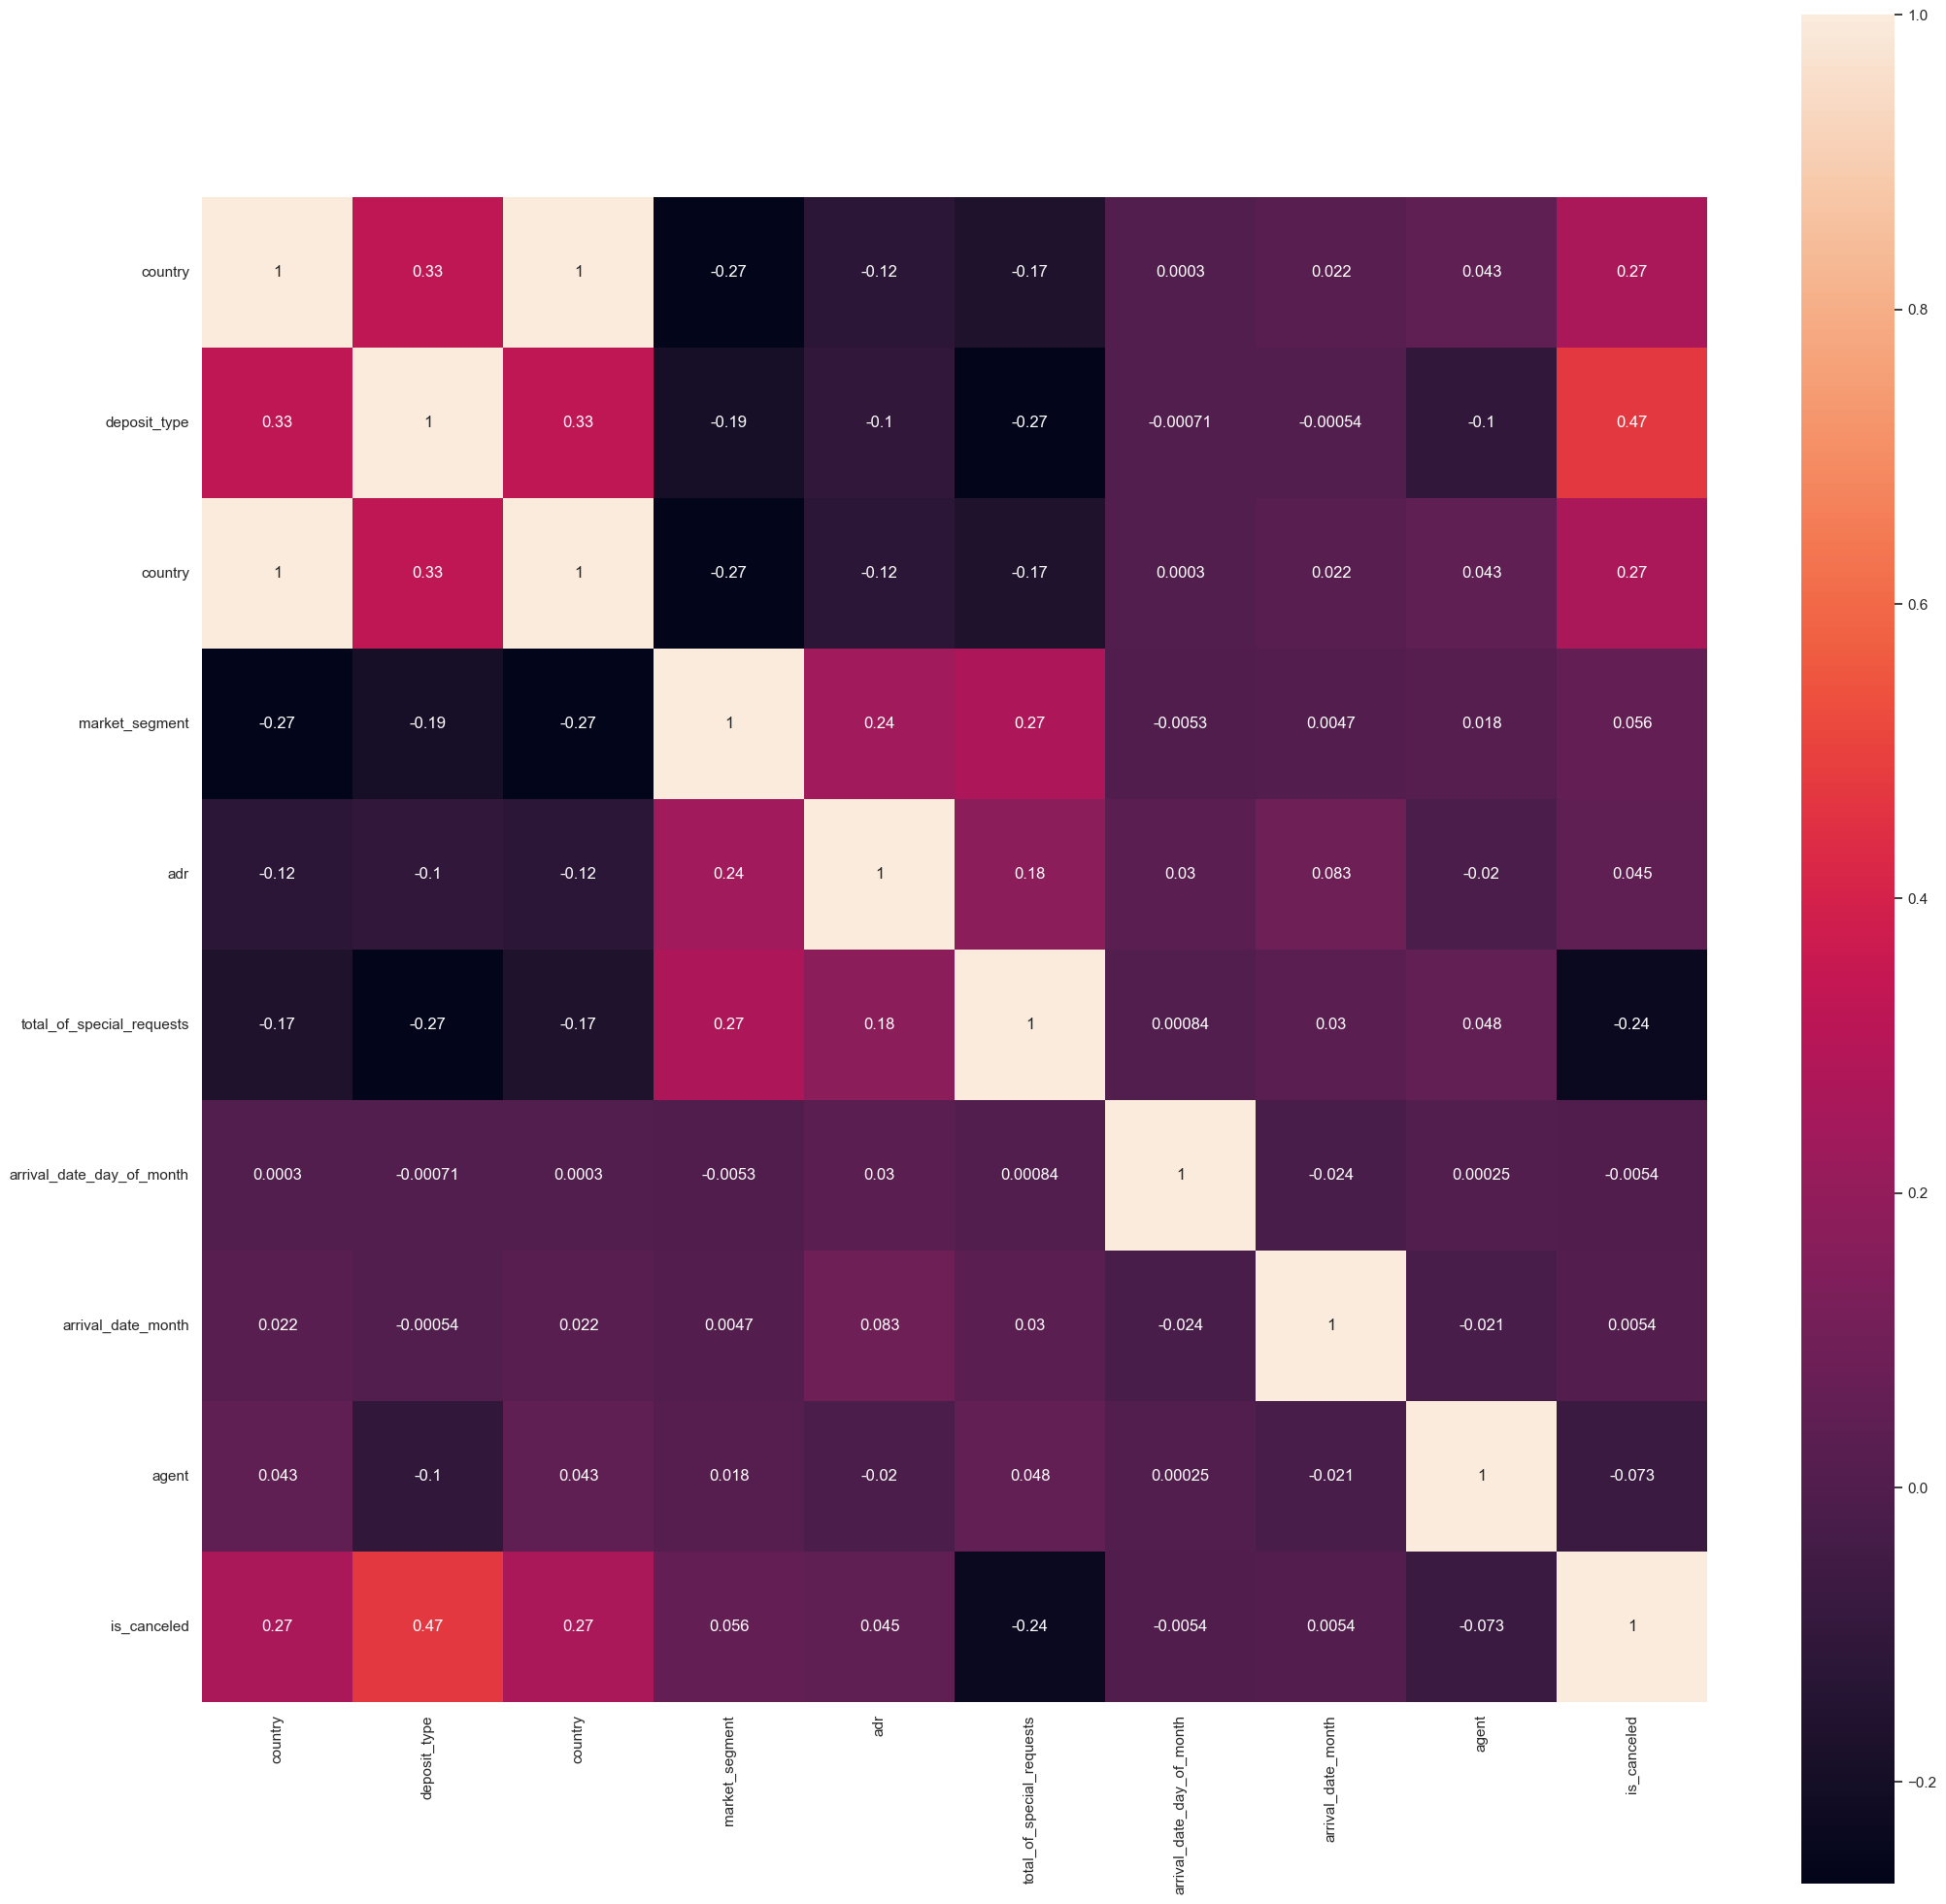

In [72]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(25, 25)})
sns.heatmap(cek_corr.corr(), annot=True, square=True)

Tidak ada multikolinearitas pada data yang baru, maka aman untuk dimodelkan

## Hyperparameter Tuning Modelling

### **Logistic Regression**

In [73]:
lr_params = {
            'C': [0.1, 0.5, 0.9, 1, 2, 5],
            'penalty':['l1','l2'],
            'random_state':[24,32,56,65]
            }

params = {
        'estimator': LogisticRegression(),
        'param_distributions': lr_params,
        'cv': 5,
        'n_iter': 15,
        'n_jobs': -1,
        'scoring': 'roc_auc',
        }

lr_cv = RandomizedSearchCV(**params)

In [16]:
lr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [17]:
lr_cv.best_params_

{'random_state': 24, 'penalty': 'l2', 'C': 5}

In [18]:
lr_model = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
proba_lr = lr_model.predict_proba(X_test)

In [19]:
accuracy_score(y_test, y_pred_lr)

0.7536633902188988

In [20]:
cross_val_score(lr_model, X_test, y_test, cv = 10).mean()

# Naiknya dikit banget

0.7533620395677778

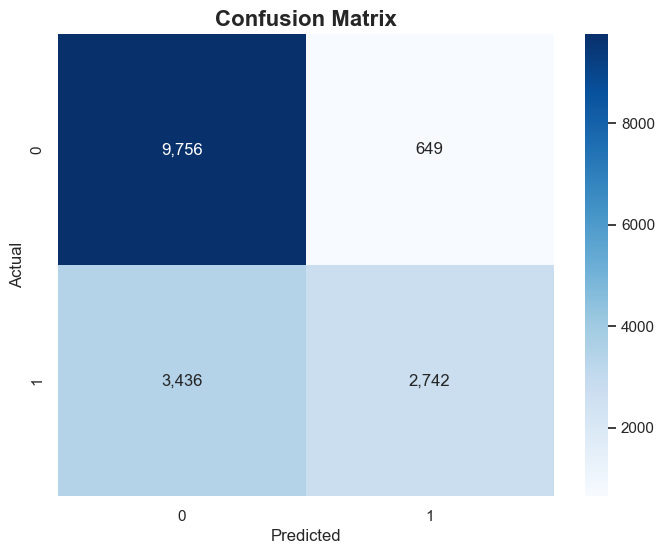

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))

confus_rand = confusion_matrix(y_test, y_pred_lr)

# Mengatur format angka dalam ribuan
annot_labels = [['{:,}'.format(count) for count in row] for row in confus_rand]

sns.heatmap(confus_rand, annot=annot_labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83     10405
           1       0.81      0.44      0.57      6178

    accuracy                           0.75     16583
   macro avg       0.77      0.69      0.70     16583
weighted avg       0.77      0.75      0.73     16583



In [49]:
# Mengimpor library yang diperlukan
from sklearn.metrics import confusion_matrix

# Matriks kebingungan yang sudah ada
confus_rand = confusion_matrix(y_test, y_pred_lr)

# Menghitung True Positives (TP) dan False Negatives (FN) dari matriks
TP = confus_rand[1, 1]  # True Positives
FN = confus_rand[1, 0]  # False Negatives

# Menghitung False Negative Rate (FNR)
FNR_LR = FN / (FN + TP)

print(f"False Negative Rate (FNR): {FNR_LR:.4f}")

# Gagal mendeteksi 56% kasus positif yang sebenarnya (orang yang benar2 cancel)

False Negative Rate (FNR): 0.5562


In [24]:
# Melihat grafik ROC-nya

def lr_curve():    
    fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, proba_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.subplot(151)
    plt.title('ROC AUC Logistic Regression')
    plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='orange', alpha=1)
    plt.legend(loc = 'lower right')

### **Random Forest Classified**

In [25]:
rf_params = {
        'max_depth': [5, 10, 15, 20],
        'max_features': [2, 3, 5],
        'n_estimators': [100, 500, 1000],
        'min_samples_split': [5, 10, 15],
        }

params = {
        'estimator': RandomForestClassifier(),
        'param_distributions': rf_params,
        'cv': 5,
        'n_iter': 15,
        'n_jobs': -1,
        'scoring': 'roc_auc',
        }

rf_cv = RandomizedSearchCV(**params)

In [27]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': [2, 3, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='roc_auc')

In [28]:
rf_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'max_features': 5,
 'max_depth': 20}

In [29]:
rf_model = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
proba_rf = rf_model.predict_proba(X_test)

In [30]:
accuracy_score(y_test, y_pred_rf)

0.9210637399746728

In [31]:
cross_val_score(rf_model, X_test, y_test, cv = 10).mean()

0.9100875729198703

In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10405
           1       0.95      0.83      0.89      6178

    accuracy                           0.92     16583
   macro avg       0.93      0.90      0.91     16583
weighted avg       0.92      0.92      0.92     16583



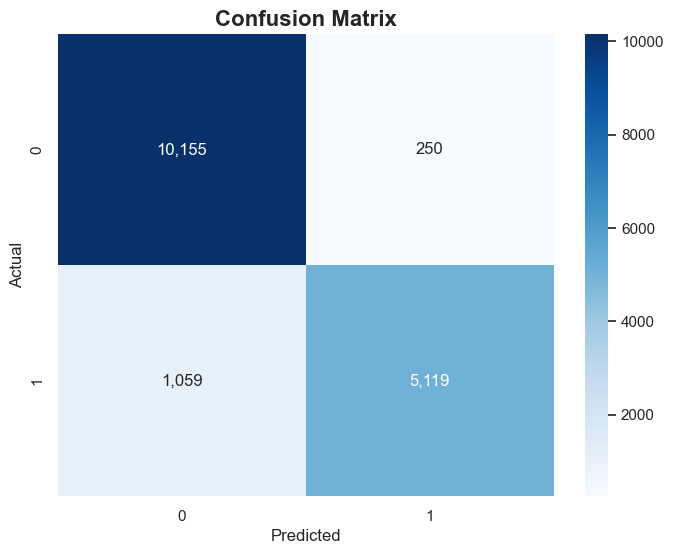

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))

confus_rand = confusion_matrix(y_test, y_pred_rf)

# Mengatur format angka dalam ribuan
annot_labels = [['{:,}'.format(count) for count in row] for row in confus_rand]

sns.heatmap(confus_rand, annot=annot_labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# Mengimpor library yang diperlukan
from sklearn.metrics import confusion_matrix

# Matriks kebingungan yang sudah ada
confus_rand = confusion_matrix(y_test, y_pred_rf)

# Menghitung True Positives (TP) dan False Negatives (FN) dari matriks
TP = confus_rand[1, 1]  # True Positives
FN = confus_rand[1, 0]  # False Negatives

# Menghitung False Negative Rate (FNR)
FNR_RF = FN / (FN + TP)

print(f"False Negative Rate (FNR): {FNR_RF:.4f}")

# Gagal mendeteksi 17% kasus positif yang sebenarnya (orang yang benar2 cancel)

False Negative Rate (FNR): 0.1714


In [35]:
def rf_curve():    
    fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, proba_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.subplot(152)
    plt.title('ROC AUC Random Forest')
    plt.plot(fpr_rf, tpr_rf, 'blue', label='AUC Rand. Forest = {}'.format(round(roc_auc_rf,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_rf,tpr_rf, 0, facecolor='lightyellow', alpha=1)
    plt.legend(loc = 'lower right')

**Gradient Boosting**

In [36]:
gb_parameters = {
                'n_estimators': [100, 500, 1000],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10],
                }

gb_params = {
            'estimator': GradientBoostingClassifier(),
            'param_distributions': gb_parameters,
            'cv': 5,
            'n_iter': 15,
            'n_jobs': -1,
            'scoring': 'roc_auc',
            }

gb_cv = RandomizedSearchCV(**gb_params)

In [37]:
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='roc_auc')

In [38]:
gb_cv.best_params_

{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 10}

In [39]:
gb_model = GradientBoostingClassifier(**gb_cv.best_params_).fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
proba_gb = gb_model.predict_proba(X_test)

In [40]:
accuracy_score(y_test, y_pred_gb)

0.9766025447747694

In [41]:
cross_val_score(gb_model, X_test, y_test, cv = 10).mean()

0.9765420693937591

In [42]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10405
           1       0.98      0.96      0.97      6178

    accuracy                           0.98     16583
   macro avg       0.98      0.97      0.97     16583
weighted avg       0.98      0.98      0.98     16583



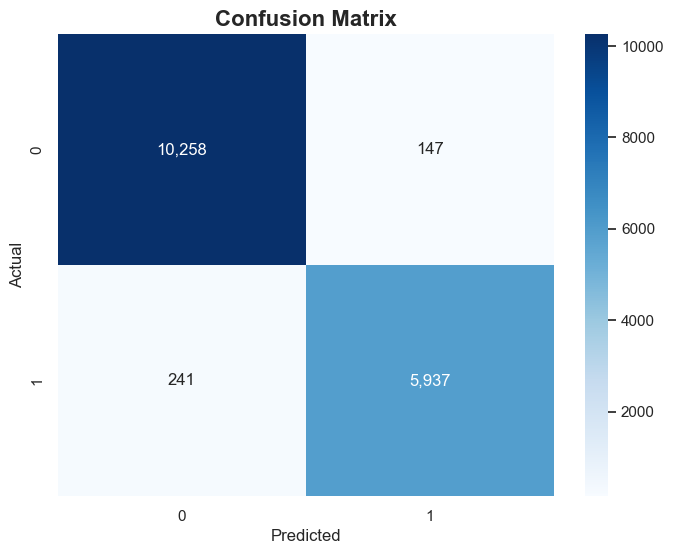

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))

confus_rand = confusion_matrix(y_test, y_pred_gb)

# Mengatur format angka dalam ribuan
annot_labels = [['{:,}'.format(count) for count in row] for row in confus_rand]

sns.heatmap(confus_rand, annot=annot_labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Mengimpor library yang diperlukan
from sklearn.metrics import confusion_matrix

# Matriks kebingungan yang sudah ada
confus_rand = confusion_matrix(y_test, y_pred_gb)

# Menghitung True Positives (TP) dan False Negatives (FN) dari matriks
TP = confus_rand[1, 1]  # True Positives
FN = confus_rand[1, 0]  # False Negatives

# Menghitung False Negative Rate (FNR)
FNR_GB = FN / (FN + TP)

print(f"False Negative Rate (FNR): {FNR_GB:.4f}")

# Gagal mendeteksi 3% kasus positif yang sebenarnya (orang yang benar2 cancel)

False Negative Rate (FNR): 0.0390


In [45]:
def gb_curve():    
    fpr_gb, tpr_gb, thres_gb = roc_curve(y_test, proba_gb[:,1])
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    plt.subplot(153)
    plt.title('ROC AUC Gradient Boosting')
    plt.plot(fpr_gb, tpr_gb, 'blue', label='AUC Gradient Boosting = {}'.format(round(roc_auc_gb,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_gb,tpr_gb, 0, facecolor='lightblue', alpha=1)
    plt.legend(loc = 'lower right')

## Evaluation

In [48]:
from sklearn.metrics import f1_score

# Inisialisasi list untuk menyimpan nilai F1-score
f1_scores_class_0 = []
f1_scores_class_1 = []

models = [lr_model, rf_model, gb_model]  # Hanya model yang Anda miliki

for model in models:
    # Membuat prediksi menggunakan model
    y_pred = model.predict(X_test)
    
    # Menghitung F1-score untuk kelas 0 (Not Canceled)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    
    # Menghitung F1-score untuk kelas 1 (Canceled)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Menambahkan nilai F1-score ke dalam list
    f1_scores_class_0.append(round(f1_0, 4) * 100)  # Mengalikan dengan 100 untuk mendapatkan persentase
    f1_scores_class_1.append(round(f1_1, 4) * 100)  # Mengalikan dengan 100 untuk mendapatkan persentase

# Membuat DataFrame dengan nilai F1-score untuk kedua kelas
f1_scores_df = pd.DataFrame({'MODEL': ['Logistic Reg', 
                                       'Random Forest', 
                                       'Gradient Boost'], 
                             'F1-Score (0 = Not Canceled)': f1_scores_class_0,
                             'F1-Score (1 = Canceled)': f1_scores_class_1})
f1_scores_df


,MODEL,F1-Score (0 = Not Canceled),F1-Score (1 = Canceled)
0,Logistic Reg,82.69,57.31
1,Random Forest,93.95,88.66
2,Gradient Boost,98.14,96.84


In [60]:
FNR_df = pd.DataFrame({'MODEL': ['Logistic Reg', 'Random Forest', 'Gradient Boost'],
                       'False Negative Rate (LR)': [FNR_LR,FNR_RF,FNR_GB],
                       '%':[(FNR_LR*100),(FNR_RF*100),(FNR_GB*100)]})
FNR_df

,MODEL,False Negative Rate (LR),%
0,Logistic Reg,0.556167,55.616704
1,Random Forest,0.171415,17.141470
2,Gradient Boost,0.039009,3.900939


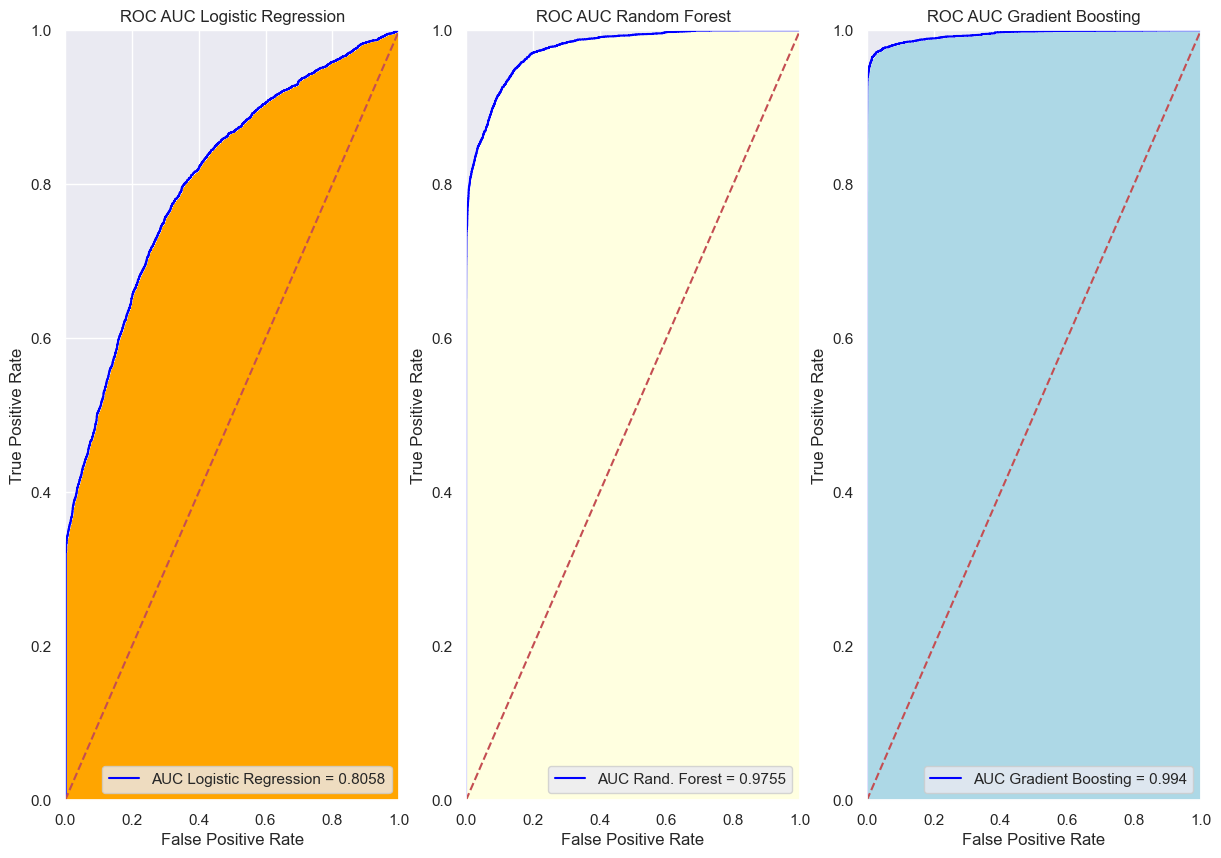

In [47]:
plt.figure(figsize = (25, 10))
lr_curve()
rf_curve()
gb_curve()